In [423]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import backtrader as bt
import seaborn as sns
import statsmodels.api as sm


class SMABacktester():
    def __init__(self,symbol,SMA_S,SMA_L,start,end):
        self.symbol=symbol
        self.SMA_S=SMA_S
        self.SMA_L=SMA_L
        self.start=start
        self.end=end
        self.results=None
        self.get_data()
        
    def get_data(self):
        df = yf.download(self.symbol,start=self.start,end=self.end)
        data= df.Close.to_frame()
        data["Returns"]=np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"]=data.Close.rolling(int(self.SMA_S)).mean()
        data["SMA_L"]=data.Close.rolling(int(self.SMA_L)).mean()
        data.dropna(inplace=True)
        self.data2=data
        
        return data
    
    def test_results(self):
        data=self.data2.copy().dropna()
        data["Position"]=np.where(data["SMA_S"]>data["SMA_L"],1,-1)
        data["Strategy"]=data["Returns"]*data.Position.shift(1)
        data.dropna(inplace=True)
        data["Returns, Buy/Hold"]=data["Returns"].cumsum().apply(np.exp)
        data["Returns Strategy"]=data["Strategy"].cumsum().apply(np.exp)
        perf=data["Returns Strategy"].iloc[-1]
        outperf=perf-data["Returns, Buy/Hold"].iloc[-1]
        self.results=data
        
        ret=np.exp(data["Strategy"].sum())
        std=data["Strategy"].std()*np.sqrt(252)
        
        #return ret,std
            
        return round(perf,6), round(outperf,6)
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please:)")
        else:
            title=" {} SMA_S {} Day | SMA_L {} Day ".format(self.symbol,self.SMA_S,self.SMA_L)
            self.results[["Returns, Buy/Hold","Returns Strategy"]].plot(title=title, figsize=(12,8))
            
class compareStocks():
    def __init__(self,symbol,symbol2,symbol3,start,end):
        self.symbol=symbol
        self.symbol2=symbol2
        self.symbol3=symbol3
        self.start=start
        self.end=end
        self.results=None
    
    
    def compare_stocks(self):
        
        ticker = [self.symbol,self.symbol2,self.symbol3]
        stocks = yf.download(ticker,start=self.start,end=self.end)
        close = stocks.loc[:,"Close"].copy()
        normClose=close.div(close.iloc[0]).mul(100)
        normClose.plot(figsize=(15,8), fontsize=12)
        plt.title("Compare Securities",fontsize=15)
        plt.xlabel("Time", fontsize=15)
        plt.ylabel("Price of Underlying", fontsize=15)
        plt.legend(fontsize=12)
   
    def risk_return(self):
        ticker = [self.symbol,self.symbol2,self.symbol3]
        stocks = yf.download(ticker,start=self.start,end=self.end)
  
        close = stocks.loc[:,"Close"].copy()
        ret= close.pct_change().dropna()
        normClose=close.div(close.iloc[0]).mul(100)
        ret.describe().T.loc[:,["mean","std"]]
        summary = ret.describe().T.loc[:,["mean","std"]]
        summary["mean"] = summary["mean"]*252
        summary["std"] = summary["std"]*np.sqrt(252)
        
        summary.plot.scatter(x = "std", y = "mean", figsize= (12,8),s=50, fontsize=15)
        for i in summary.index:
            plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
        plt.xlabel("Annual Risk(Standard Deviation)", fontsize=15)
        plt.ylabel("Annual Return", fontsize=15)
        plt.title("Risk/Return",fontsize=25)
        plt.show
       
       
        return plt.show()
    
    def corr_cov(self):
        ticker = [self.symbol,self.symbol2,self.symbol3]
        stocks = yf.download(ticker,start=self.start,end=self.end)
        close = stocks.loc[:,"Close"].copy()
        ret= close.pct_change().dropna()
       
        ret.cov()
        ret.corr()
        
        plt.figure(figsize=(12,8))
        sns.set(font_scale=1.4)
        sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6).set(title='Correlation Heatmap')
        
       
        return plt.show()

class compare_set():
    def __init__(self, start,end):
        
        self.start=start
        self.end=end
        self.results=None


    def compare_set(self):
        ticker = ["SPY", "IONQ","AMZN", "TSM","PYPL","GOEV","WMT","PG"]
        stocks = yf.download(ticker, start=self.start, end=self.end)
        close = stocks.loc[:,"Close"].copy()
        normClose=close.div(close.iloc[0]).mul(100)
        normClose.plot(figsize=(15,8), fontsize=12)
        plt.title("Compare Securities",fontsize=15)
        plt.xlabel("Time", fontsize=15)
        plt.ylabel("Price of Underlying", fontsize=15)
        plt.legend(fontsize=12)
        
    def risk_return(self):
        ticker = ["SPY", "IONQ","AMZN", "TSM","PYPL","GOEV","WMT","PG"]
        stocks = yf.download(ticker,start=self.start,end=self.end)
  
        close = stocks.loc[:,"Close"].copy()
        ret= close.pct_change().dropna()
        normClose=close.div(close.iloc[0]).mul(100)
        ret.describe().T.loc[:,["mean","std"]]
        summary = ret.describe().T.loc[:,["mean","std"]]
        summary["mean"] = summary["mean"]*252
        summary["std"] = summary["std"]*np.sqrt(252)
        
        summary.plot.scatter(x = "std", y = "mean", figsize= (12,8),s=50, fontsize=15)
        for i in summary.index:
            plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
        plt.xlabel("Annual Risk(Standard Deviation)", fontsize=15)
        plt.ylabel("Annual Return", fontsize=15)
        plt.title("Risk/Return",fontsize=25)
        plt.show
       
       
        return plt.show()
    
    def corr_cov(self):
        ticker = ["SPY", "IONQ","AMZN","TSM","PYPL","GOEV","WMT","PG"]
        stocks = yf.download(ticker,start=self.start,end=self.end)
        close = stocks.loc[:,"Close"].copy()
        ret= close.pct_change().dropna()
       
        ret.cov()
        ret.corr()
        
        #plt.figure(figsize=(12,8))
        sns.set(font_scale=1.4)
        sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.8).set(title='Correlation Heatmap')
        plt.figure(figsize=(12,8))

        #sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6)
        plt.show()

class calcDrawDown():
    def __init__(self,symbol,start,end):
        self.symbol=symbol
        self.start=start
        self.end=end
        self.results=None
    
    def draw_down(self):
        ticker = yf.download(self.symbol,start=self.start,end=self.end)
        
        tick = ticker.Close.to_frame()
        tick.Close
       
        tick["d_returns"] = np.log(tick.div(tick.shift(1)))
        tick.dropna(inplace=True)
        tick.d_returns.sum()
        np.exp(tick.d_returns.sum())

        tick["CummReturns"]=tick.d_returns.cumsum().apply(np.exp)  
        tick["CummMax"]=tick.CummReturns.cummax()
         
        
        tick[["CummReturns","CummMax"]].plot(figsize=(12,8),title=" {} Buy & Hold + Cummulative Returns".format(self.symbol),fontsize=12)
       
        
    
        

In [424]:
tester2=compareStocks("COST","HD","AMD","2021-01-01","2023-12-08")

In [425]:
tester=SMABacktester("COST",5,30, "2021-01-01","2023-12-15")

[*********************100%%**********************]  1 of 1 completed


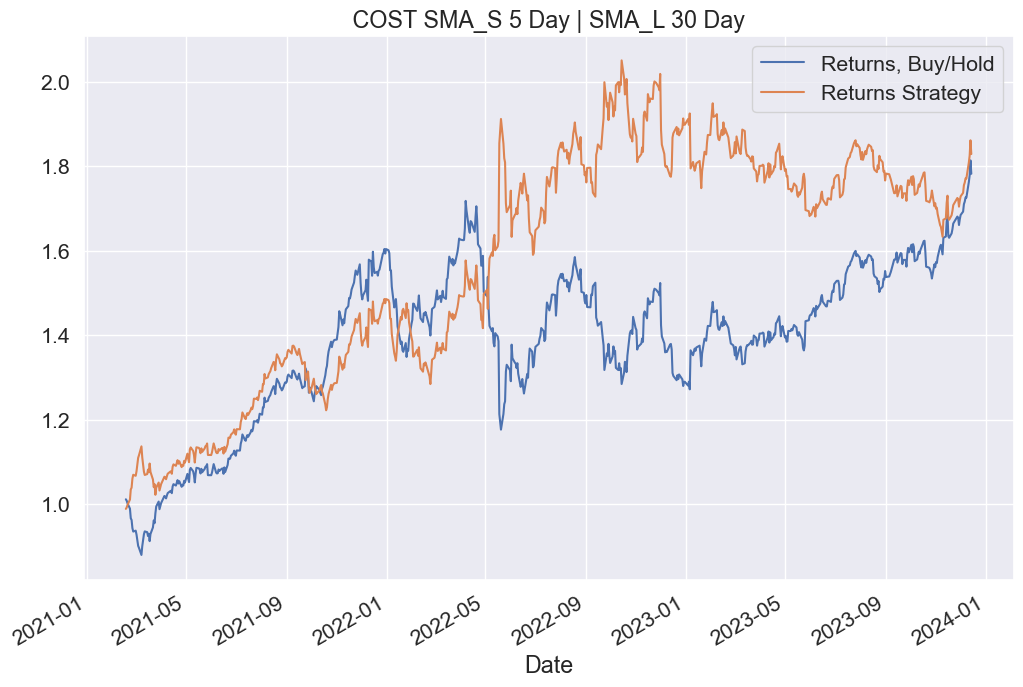

In [426]:
tester.test_results()
tester.plot_results()

[*********************100%%**********************]  3 of 3 completed


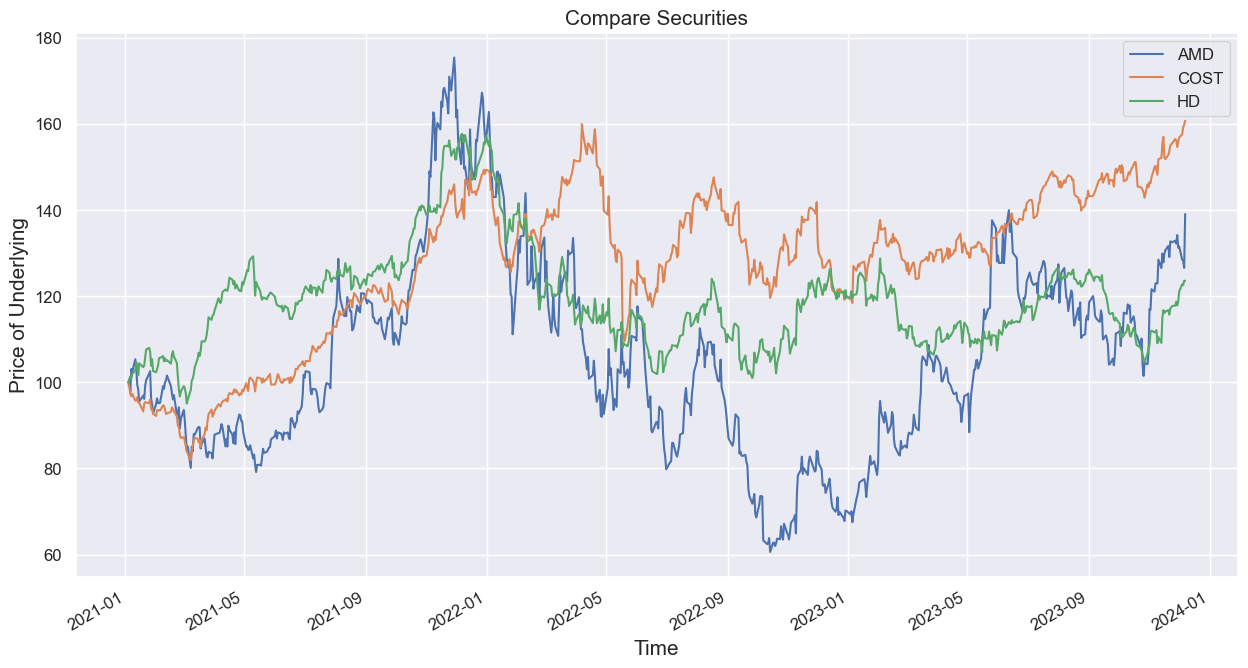

In [427]:
tester2.compare_stocks()

[*********************100%%**********************]  3 of 3 completed


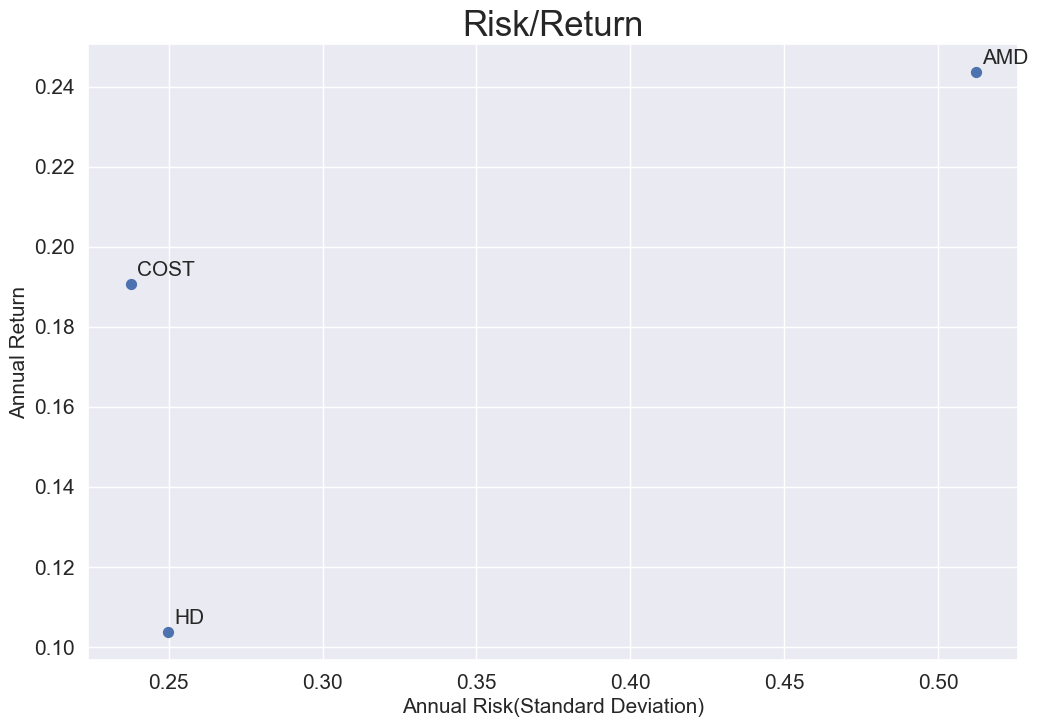

In [428]:
tester2.risk_return()

[*********************100%%**********************]  3 of 3 completed


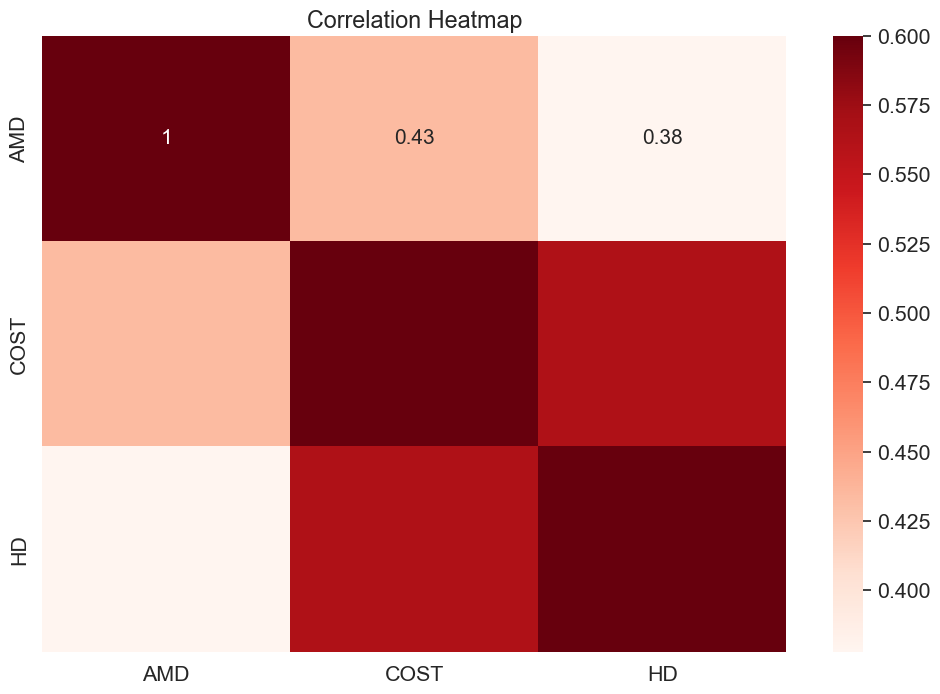

In [429]:
tester2.corr_cov()

In [430]:
tester3=compare_set("2022-01-01","2023-12-15")

[*********************100%%**********************]  8 of 8 completed


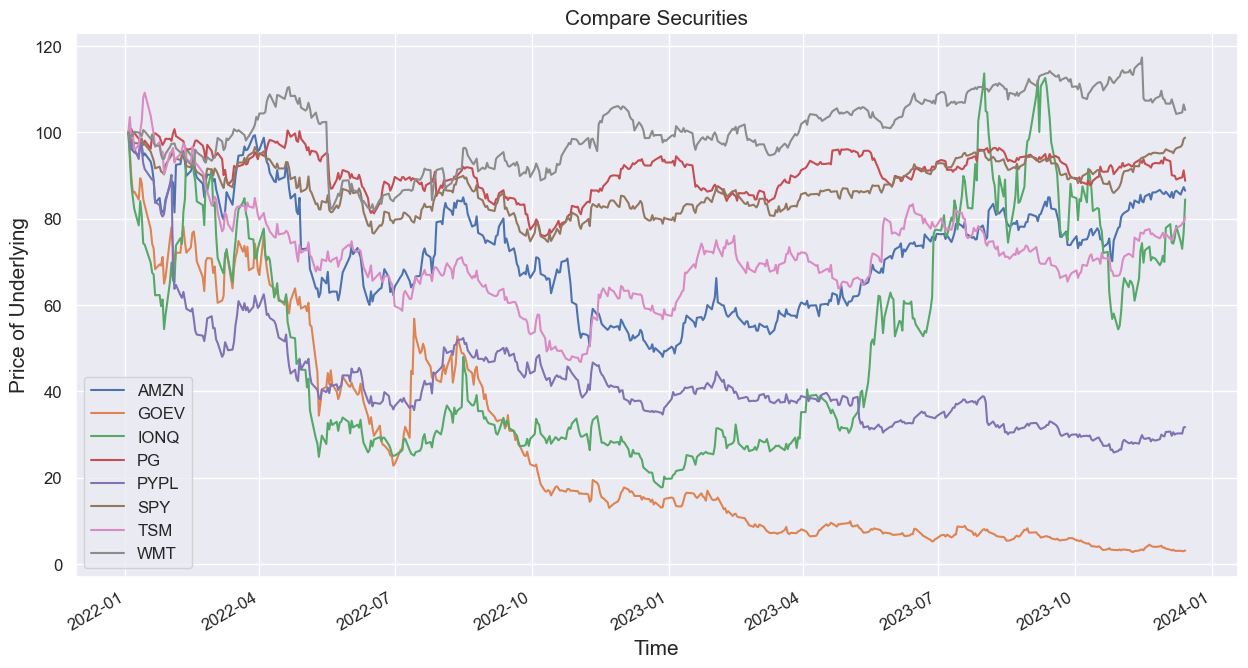

In [431]:
tester3.compare_set()

[*********************100%%**********************]  8 of 8 completed


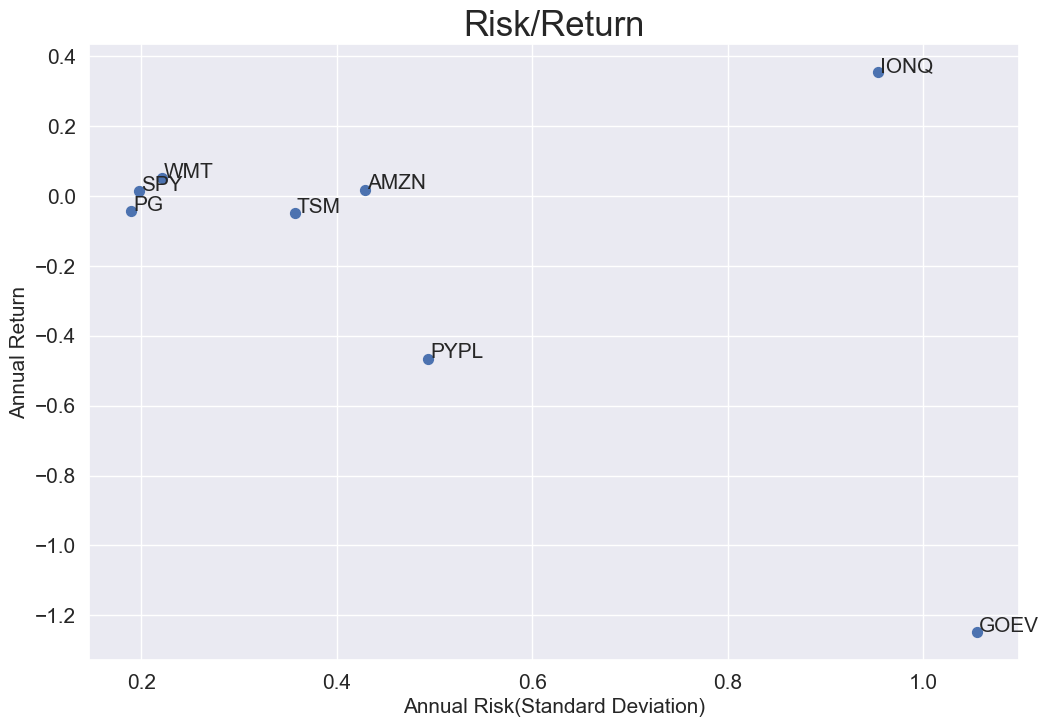

In [432]:
tester3.risk_return()

[*********************100%%**********************]  8 of 8 completed


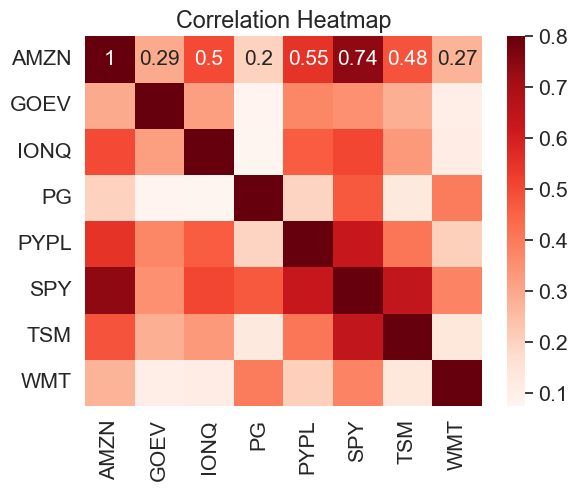

<Figure size 1200x800 with 0 Axes>

In [433]:
tester3. corr_cov()

In [434]:
tester4= calcDrawDown("COST","2021-01-01","2023-12-15")

[*********************100%%**********************]  1 of 1 completed


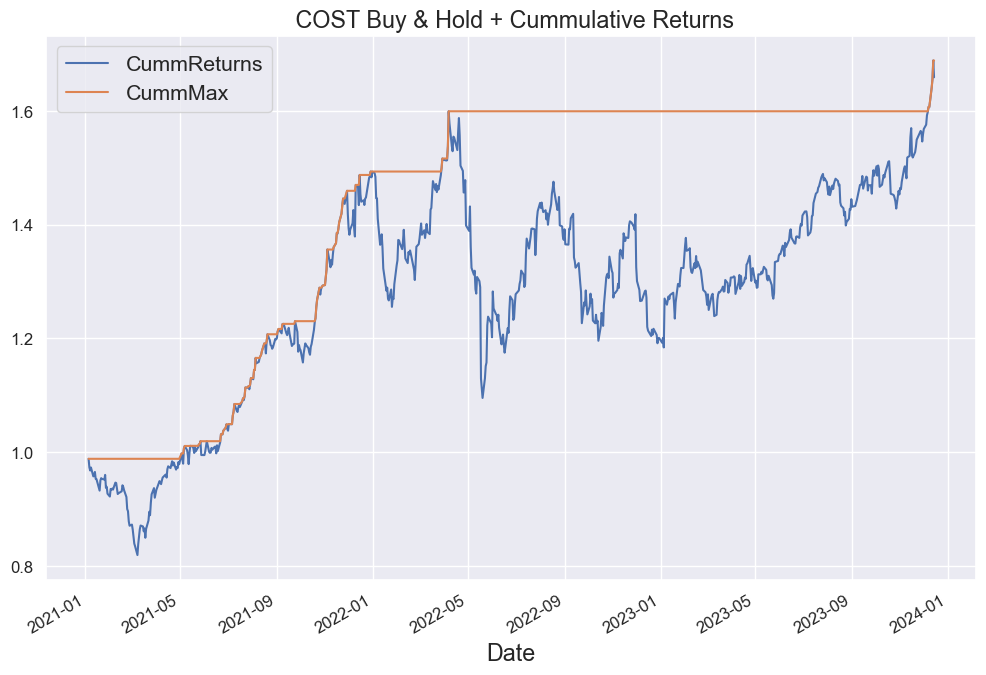

In [435]:
tester4.draw_down()